In [3]:
import richdem as rd
import rasterio
from rasterio import plot
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## create a rasterio dataset object using the DEM geotiff file `madeenah.tif`

In [4]:
madeenah_rio_ds = rasterio.open("../Data/DHMVIIDSMRAS1m_k10/GeoTIFF/DHMVIIDSMRAS1m_k10.tif")

## get rasterio dataset's coordinate system

In [5]:
madeenah_rio_ds.crs

CRS.from_epsg(31370)

## get rasterio dataset's number of bands

In [6]:
madeenah_rio_ds.count

1

## get rasterio dataset's bounds

In [7]:
madeenah_rio_ds.bounds

BoundingBox(left=226000.0, bottom=218000.0, right=238000.0, top=227000.0)

## get rasterio dataset's width and height in pixels

In [8]:
raster_width = madeenah_rio_ds.width
raster_height = madeenah_rio_ds.height

'width= {}, height={}'.format(raster_width,raster_height)

'width= 12000, height=9000'

## plot the rasterio dataset, DEM

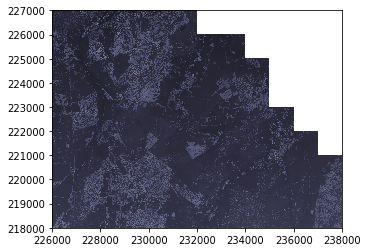

In [9]:
rasterio.plot.show(madeenah_rio_ds,cmap='bone')

## create a band1 object of the rasterio dataset
### *** bands in rasterio are numpy arrays

In [10]:
madeenah_rio_band1 = madeenah_rio_ds.read(1).astype('float64')

## get pixel value by passing row & col from band1

In [11]:
madeenah_rio_band1[1,5]

28.959999084472656

## get longitude & latitude coordinates by passing row & col from the rasterio dataset
### *** you cannot get longitude & latitude coordinates from a rasterio band since it is only a numpy array

In [12]:
madeenah_rio_ds.xy(1,5)

(226005.5, 226998.5)

<hr style="height:3px;color:gray;background-color:dark gray">

##  create a richdem object using rasterio band1

In [13]:
madeenah_richdem = rd.rdarray(madeenah_rio_band1, no_data=-9999)

## now plot the richdem object

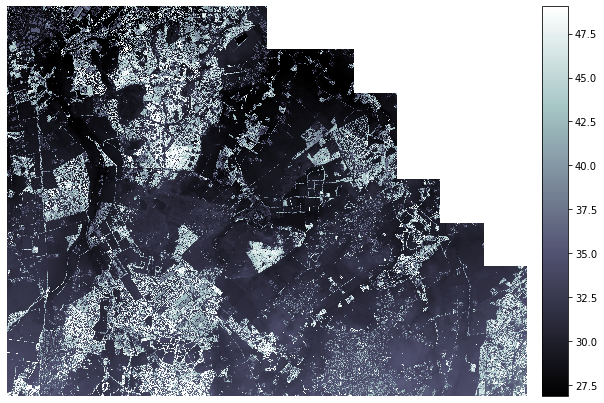

{'vmin': 26.899999618530273, 'vmax': 49.04999923706055}

In [14]:
rd.rdShow(madeenah_richdem, axes=False, cmap='bone', figsize=(9, 6))

# create slope raster using richdem

In [15]:
madeenah_rich_slope = rd.TerrainAttribute(madeenah_richdem, attrib='slope_degrees')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


# plot slope values

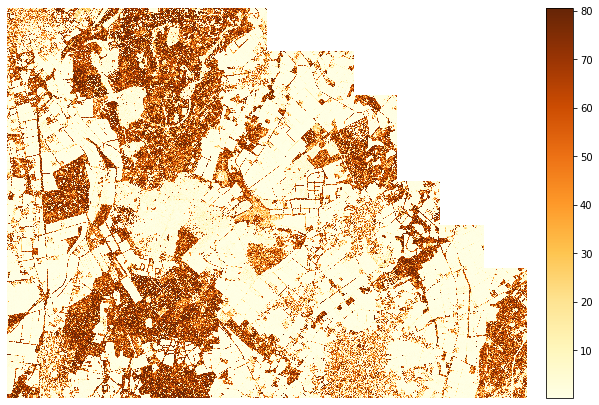

{'vmin': 0.20253632962703705, 'vmax': 80.45565032958984}

In [16]:
rd.rdShow(madeenah_rich_slope, axes=False, cmap='YlOrBr', figsize=(9, 6))

# create aspect using richdem

In [16]:
madeenah_rich_aspect = rd.TerrainAttribute(madeenah_richdem, attrib='aspect')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


# plot aspect values

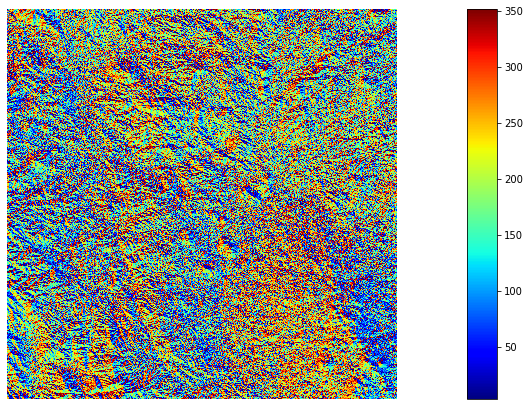

{'vmin': 3.6522228717803955, 'vmax': 351.5730285644531}

In [17]:
rd.rdShow(madeenah_rich_aspect, axes=False, cmap='jet', figsize=(9, 6))

# generate a dictionary of the following lists:

# 1. geometry point objects (shapely geomteries)
# 2. Attributes : elvation, slope, and aspect

In [19]:
pnt_data = {'elevation':[],'slope':[],'aspect':[],'geometry':[]}

width_step = 7
height_step = 200

for i in range(0,raster_width,width_step):
    if i % 47 == 0 and i != 0:
        for j in range(200,raster_height-height_step,height_step):
            pnt_data['elevation'].append(round(madeenah_richdem[i,j],2))
            pnt_data['slope'].append(round(madeenah_rich_slope[i,j],2))
            pnt_data['aspect'].append(round(madeenah_rich_aspect[i,j],2))
            pnt_data['geometry'].append(Point(madeenah_rio_ds.xy(i,j)))



# Create a geopandas dataframe from the dictionary

In [20]:
gp_df = gpd.GeoDataFrame(pnt_data, crs="EPSG:4326")

# export the geopandas datafrane to geojson

In [21]:
gp_df.to_file('./random_pnts.geojson', driver="GeoJSON")

# export the geopandas datafrane to shapefile

In [22]:
gp_df.to_file('./random_pnts.shp', driver="ESRI Shapefile")